# Classification

In [14]:
install.packages('rpart.plot')


The downloaded binary packages are in
	/var/folders/09/wkf60t9d5p749571dbkjv86h0000gn/T//RtmpzkPna6/downloaded_packages


In [3]:
library(rpart)

In [5]:
df = iris
head(df)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


In [6]:
set.seed(1)

train_idx = sample(1:nrow(df), 0.7*nrow(df))
train_df = df[train_idx,]
test_df = df[-train_idx,]
print(dim(train_df))
print(dim(test_df))

[1] 105   5
[1] 45  5


In [7]:
model = rpart(Species ~ Sepal.Length + Sepal.Width + Petal.Length + Petal.Width,
             data = train_df, method='class')

In [8]:
model

n= 105 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 105 68 virginica (0.33333333 0.31428571 0.35238095)  
  2) Petal.Length< 2.6 35  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.6 70 33 virginica (0.00000000 0.47142857 0.52857143)  
    6) Petal.Length< 4.95 33  2 versicolor (0.00000000 0.93939394 0.06060606) *
    7) Petal.Length>=4.95 37  2 virginica (0.00000000 0.05405405 0.94594595) *

In [15]:
library(rpart.plot)

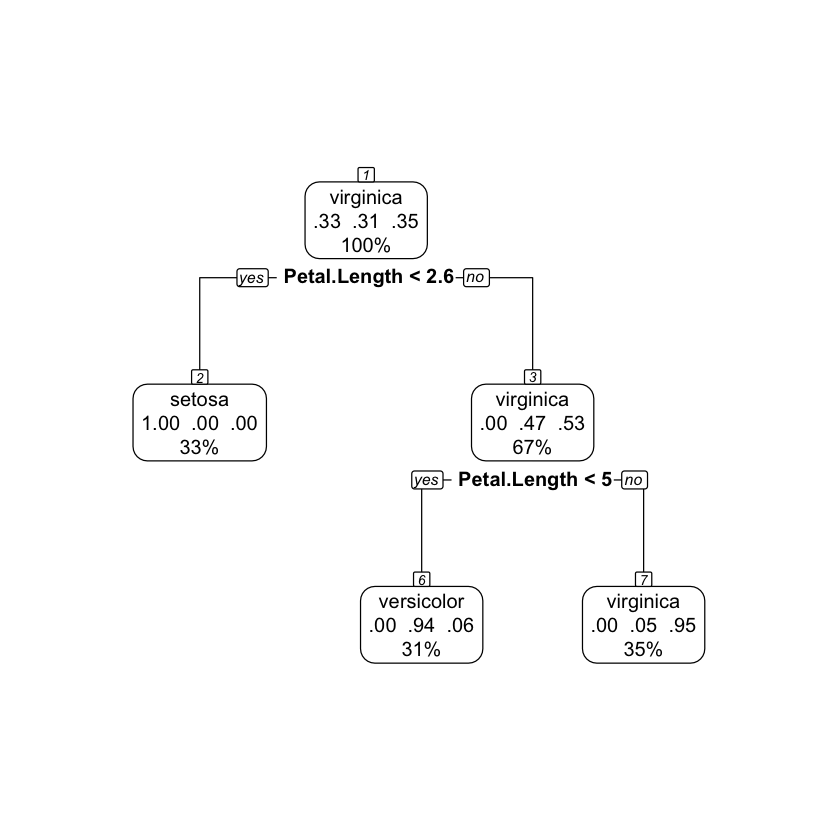

In [16]:
prp(model, type=2, extra='auto', nn=TRUE, branch=1, varlen=0, yesno=2)

In [17]:
y_pred = predict(model, test_df, type='class')
result = table(y_pred, test_df$Species)
result

            
y_pred       setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         17         4
  virginica       0          0         9

In [18]:
accuracy = sum(diag(result)/sum(result))
accuracy

[1] 0.9111111

In [19]:
new_cases = df[c(1, 10, 100, 140),]
new_cases$Species = NULL
new_cases

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
,<dbl>,<dbl>,<dbl>,<dbl>
1,5.1,3.5,1.4,0.2
10,4.9,3.1,1.5,0.1
100,5.7,2.8,4.1,1.3
140,6.9,3.1,5.4,2.1


In [20]:
predictions = predict(model, new_cases, type='class')
predictions

1         10        100        140 
    setosa     setosa versicolor  virginica 
Levels: setosa versicolor virginica

# Regression

In [21]:
model = rpart(Petal.Length ~ Petal.Width, data=train_df)
model

n= 105 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 105 342.409900 3.827619  
   2) Petal.Width< 0.8 35   1.275429 1.468571 *
   3) Petal.Width>=0.8 70  48.966430 5.007143  
     6) Petal.Width< 1.55 32   8.755000 4.337500  
      12) Petal.Width< 1.35 18   2.856111 4.027778 *
      13) Petal.Width>=1.35 14   1.952143 4.735714 *
     7) Petal.Width>=1.55 38  13.778160 5.571053 *

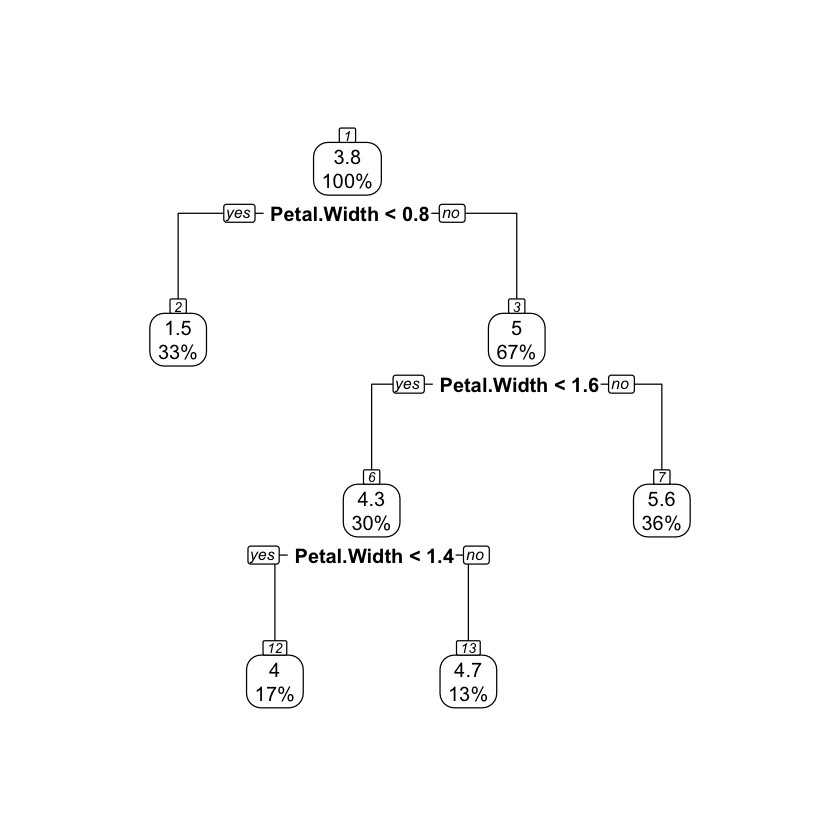

In [22]:
prp(model, type=2, extra='auto', nn=TRUE, branch=1, varlen=0, yesno=2)

In [23]:
install.packages('rattle')

also installing the dependency ‘bitops’





The downloaded binary packages are in
	/var/folders/09/wkf60t9d5p749571dbkjv86h0000gn/T//RtmpzkPna6/downloaded_packages


In [24]:
install.packages('RColorBrewer')


The downloaded binary packages are in
	/var/folders/09/wkf60t9d5p749571dbkjv86h0000gn/T//RtmpzkPna6/downloaded_packages


In [25]:
library(rattle)

Loading required package: tibble

Loading required package: bitops

Rattle: A free graphical interface for data science with R.
Version 5.4.0 Copyright (c) 2006-2020 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.



In [27]:
library(RColorBrewer)

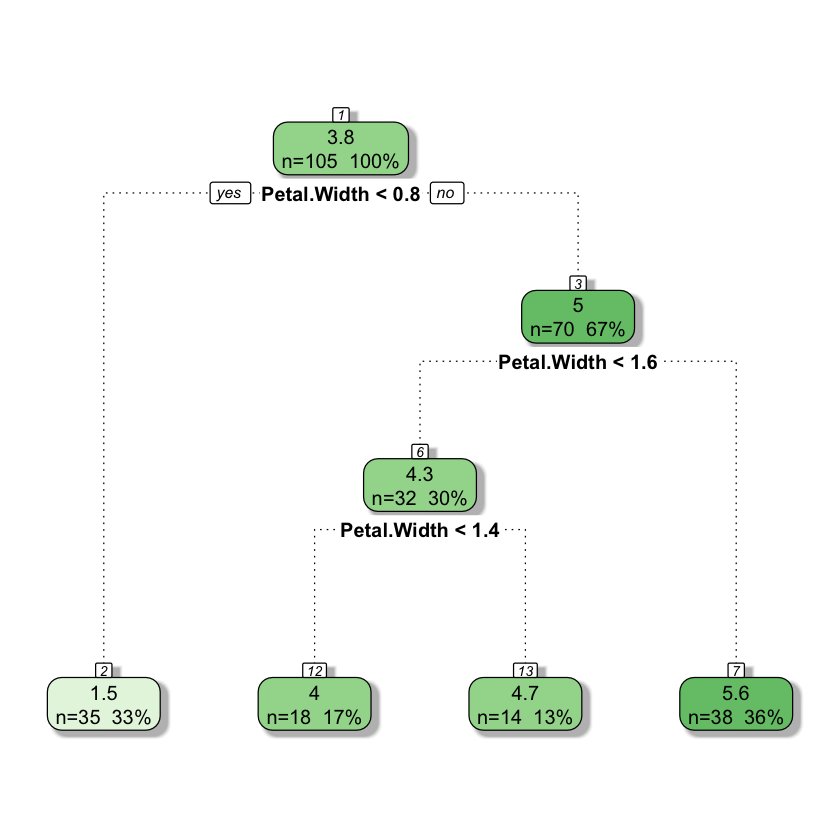

In [28]:
fancyRpartPlot(model, caption=NULL)